In [799]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [800]:
df = pd.read_csv('Avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


The year is already present in the date column, but also repeated in the year column. So we can remove the year column as it's a float, and a repeated data. 

In [801]:
df.shape

(16468, 14)

In [802]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

Since there are equal values of null values in each column, we can safely assume that after the row 1517, all the rows are null values. 

In [803]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico', nan], dtype=object)

In [804]:
df['region'].nunique()

51

The region values will have to be encoded later in the process. 

In [805]:
df['type'].unique()

array(['conventional', nan], dtype=object)

In [806]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

The 'types' column only has one value 'conventional' and this will have to be encoded. But encoding this will give the same value to the whole column and it will not make any difference or affect. So this can be removed. 

In [807]:
df['Unnamed: 0'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       nan])

In [808]:
df['Unnamed: 0'].value_counts()

38.0    40
37.0    40
36.0    39
35.0    38
33.0    38
40.0    38
39.0    38
41.0    37
34.0    37
43.0    36
42.0    36
44.0    35
45.0    34
32.0    34
46.0    33
29.0    33
31.0    33
30.0    32
28.0    31
47.0    30
2.0     28
27.0    28
3.0     28
6.0     28
4.0     28
1.0     28
5.0     28
48.0    27
0.0     27
7.0     27
8.0     26
25.0    26
26.0    26
49.0    26
20.0    25
50.0    24
12.0    24
19.0    24
21.0    24
10.0    24
11.0    24
9.0     24
17.0    24
18.0    24
24.0    24
22.0    23
23.0    23
14.0    23
51.0    23
13.0    23
16.0    23
15.0    21
Name: Unnamed: 0, dtype: int64

As per the project description, we can understand that the data is collected directly from the registeres in different stores. Also, we can see the column unnamed has index values repeated. So we can safely assume the column is irrelevant. 

In [809]:
df['XLarge Bags'].value_counts()

0.00        798
37.50         2
240.28        2
2.85          2
15.88         2
           ... 
800.63        1
136.83        1
27954.84      1
107.23        1
28709.03      1
Name: XLarge Bags, Length: 711, dtype: int64

In [810]:
df['XLarge Bags'].nunique()

711

We can see that there are 711 unique values in XLarge Bags column. The number of 0 values is 798. Imputing this values doesn't make sense. Also, Removing the column will cause a big data loss. Since there is no easy way to deal with this conundrum, we can leave it as it is. 

### Removing unwanted rows and columns

In [811]:
#Removing columns which has null values in all the columns. 
df = df.dropna(axis = 0, how = 'all')

In [812]:
df.drop('Unnamed: 0', inplace = True, axis = 1)

In [813]:
df.drop('year', inplace = True, axis = 1)

In [814]:
df.drop('type', inplace = True, axis = 1)

In [815]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany


### Converting Date to Y, M and D

First we will have to conver the date column to the proper Datetime format. 

In [816]:
df['Date'] = pd.to_datetime(df.Date)

In [817]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
region                  object
dtype: object

In [818]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [819]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany,2015,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany,2015,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany,2015,11,29


Now that we have separted the Date --> Day, Month, & Year, we can safely remove the Date column. 

In [820]:
df.drop('Date', inplace = True, axis = 1)

In [821]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany,2015,11,29


In [822]:
df.shape

(1517, 13)

### Plotting

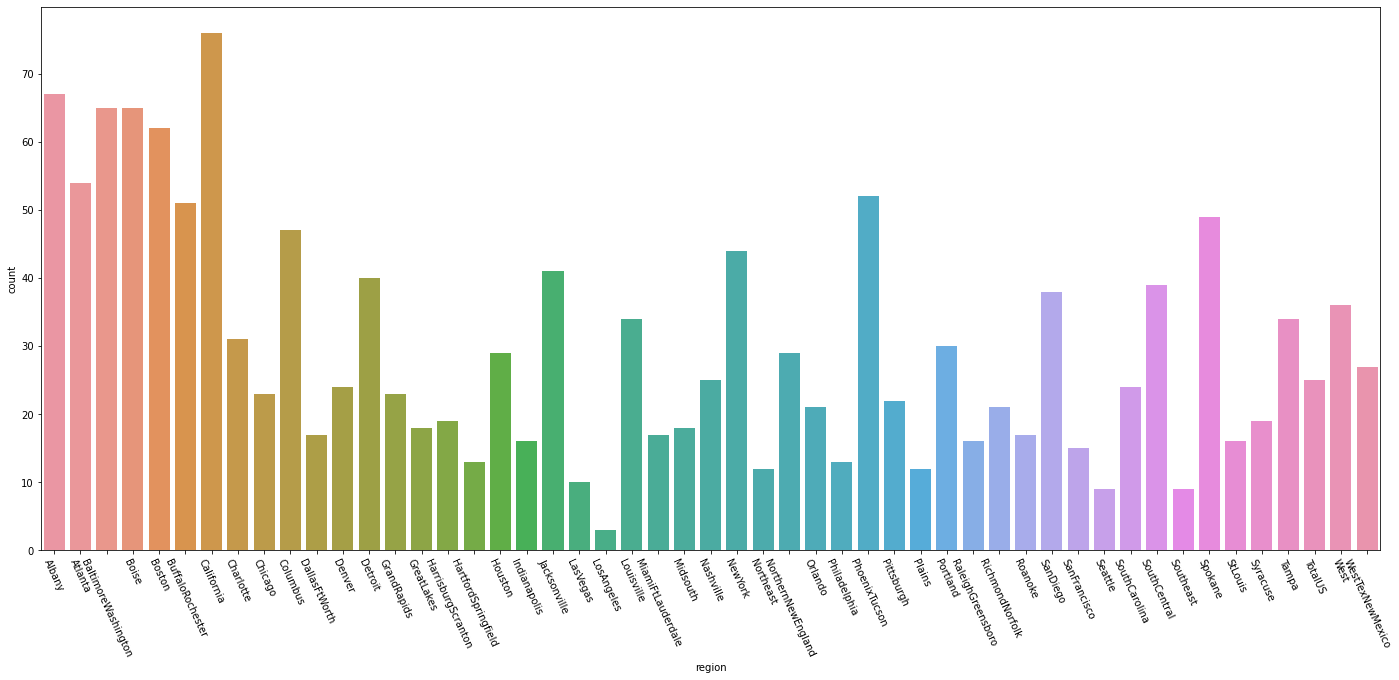

In [823]:
#To find the values of avacados sold per city
plt.figure(figsize = (24,10))
sb.countplot(x = 'region', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

We can refer to the graph above to see the distribution of Avocados sold in different regions.
    
    The values for Los Angeles, Las Vegas, Seattle, San Francisco and Southeast are visibly low compared to the other places. 

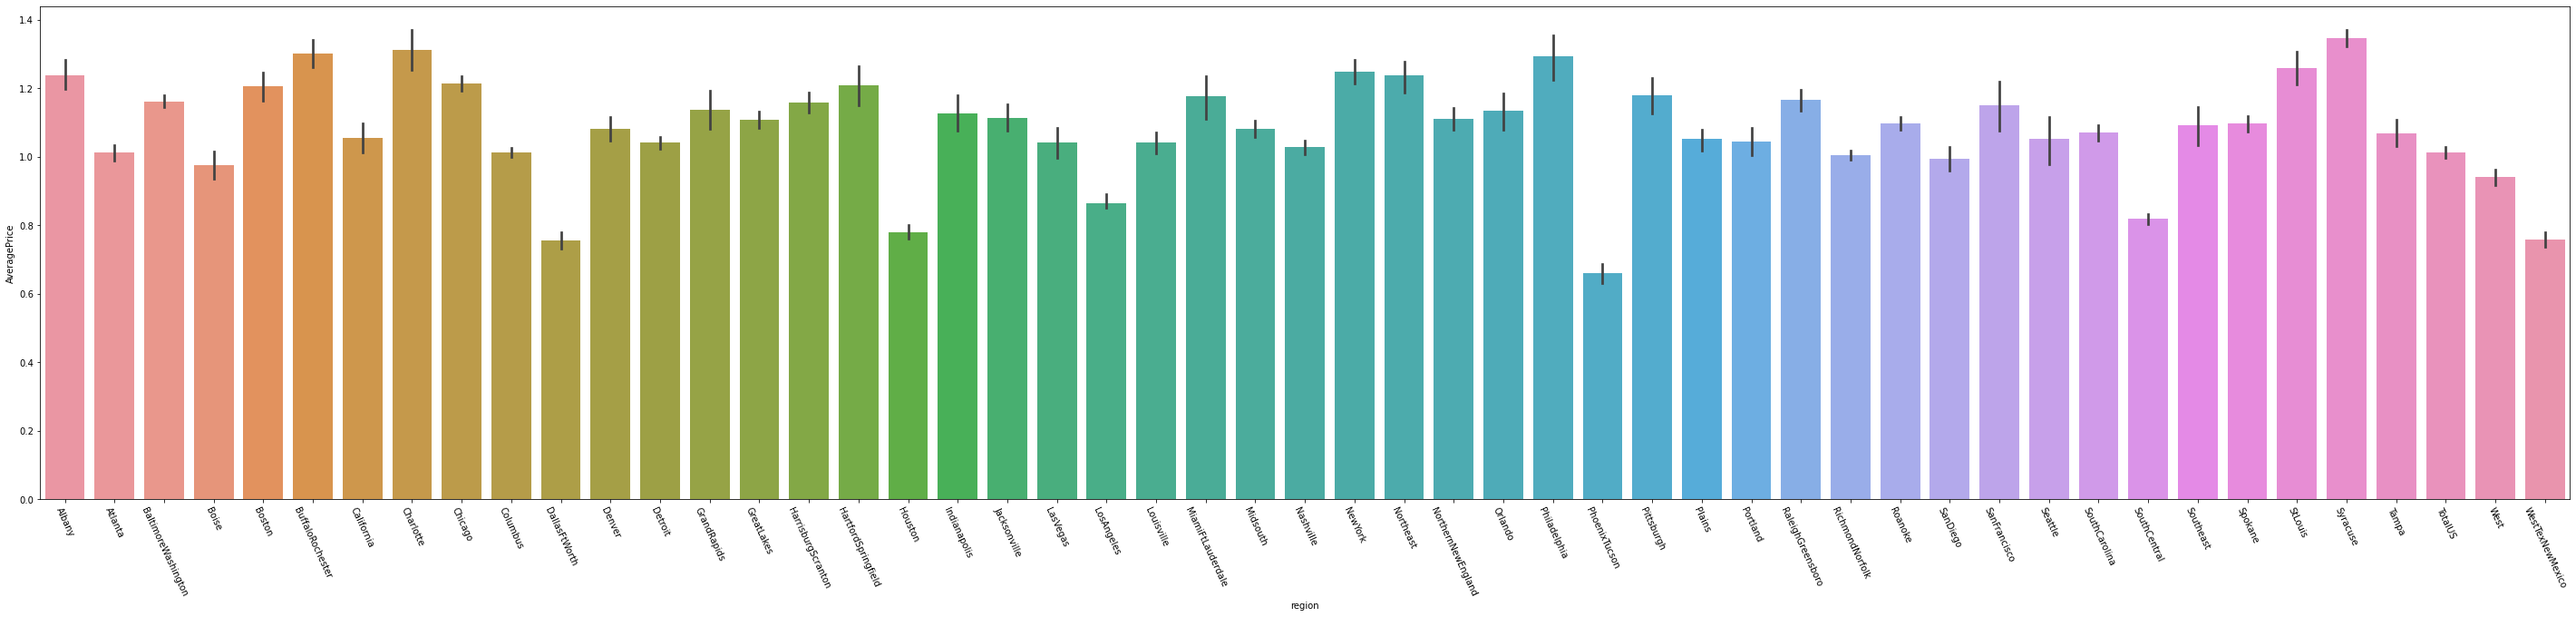

In [824]:
#To find the averate price of avacados per year. 
plt.figure(figsize = (50,10))
sb.barplot(x = 'region', y ='AveragePrice', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

The plot above shows the average values of Avacados in different regions.

    DallasFtWorth, Houston, and PheonixTucson has the lowest prices for Avacados compared to other places. 

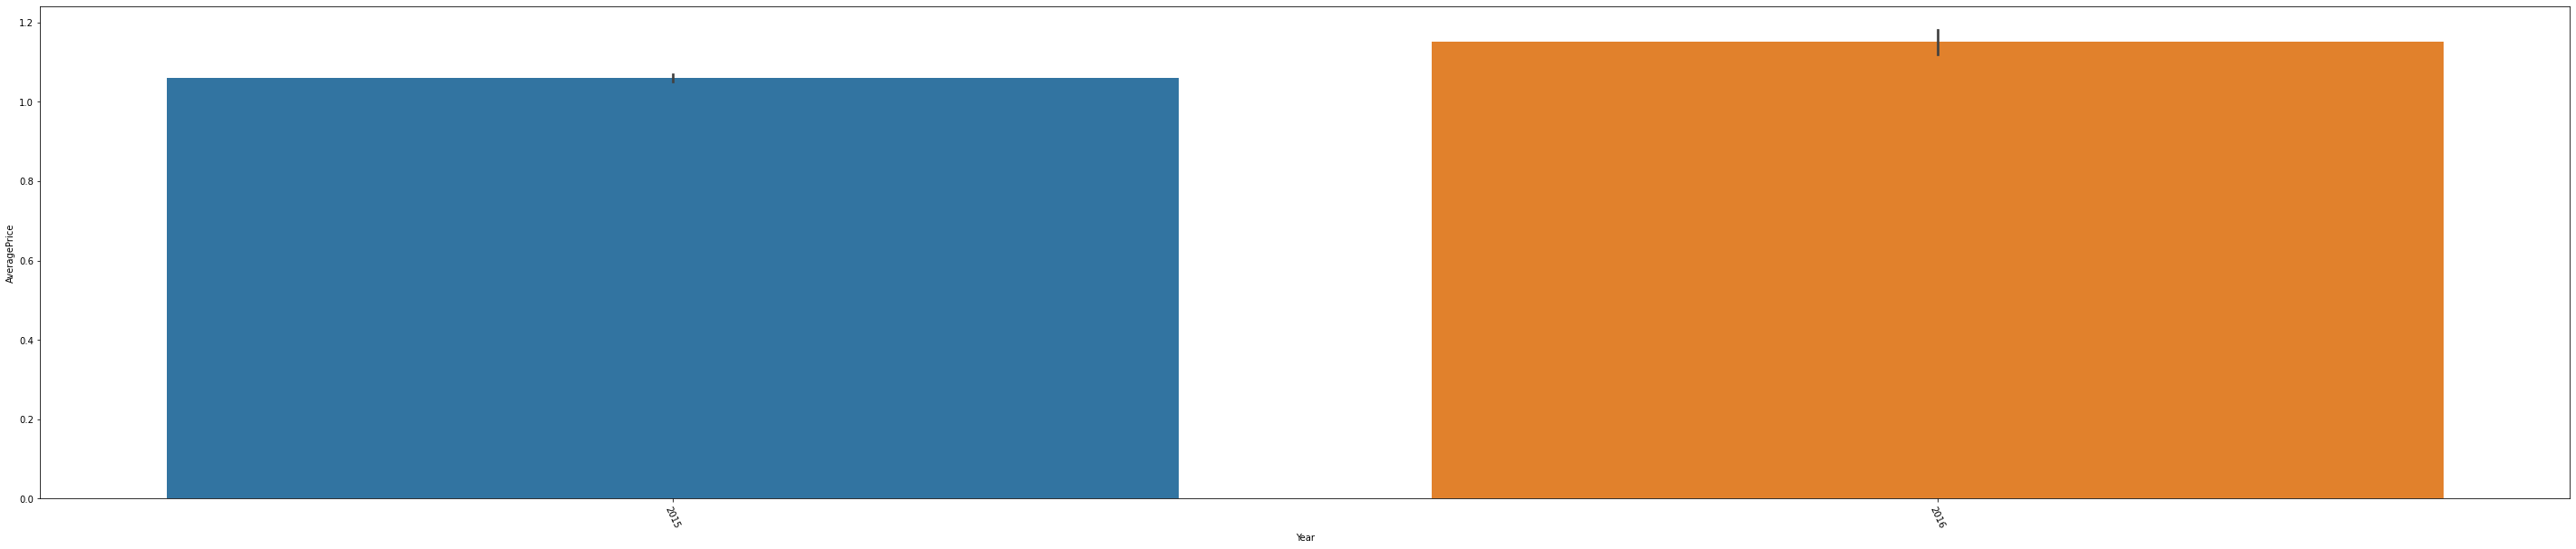

In [825]:
#To find the total volume of avocados sold per year.
plt.figure(figsize = (50,10))
sb.barplot(x = 'Year', y ='AveragePrice', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

There is a slight increase in prices for Avocados from 2015 to 2016

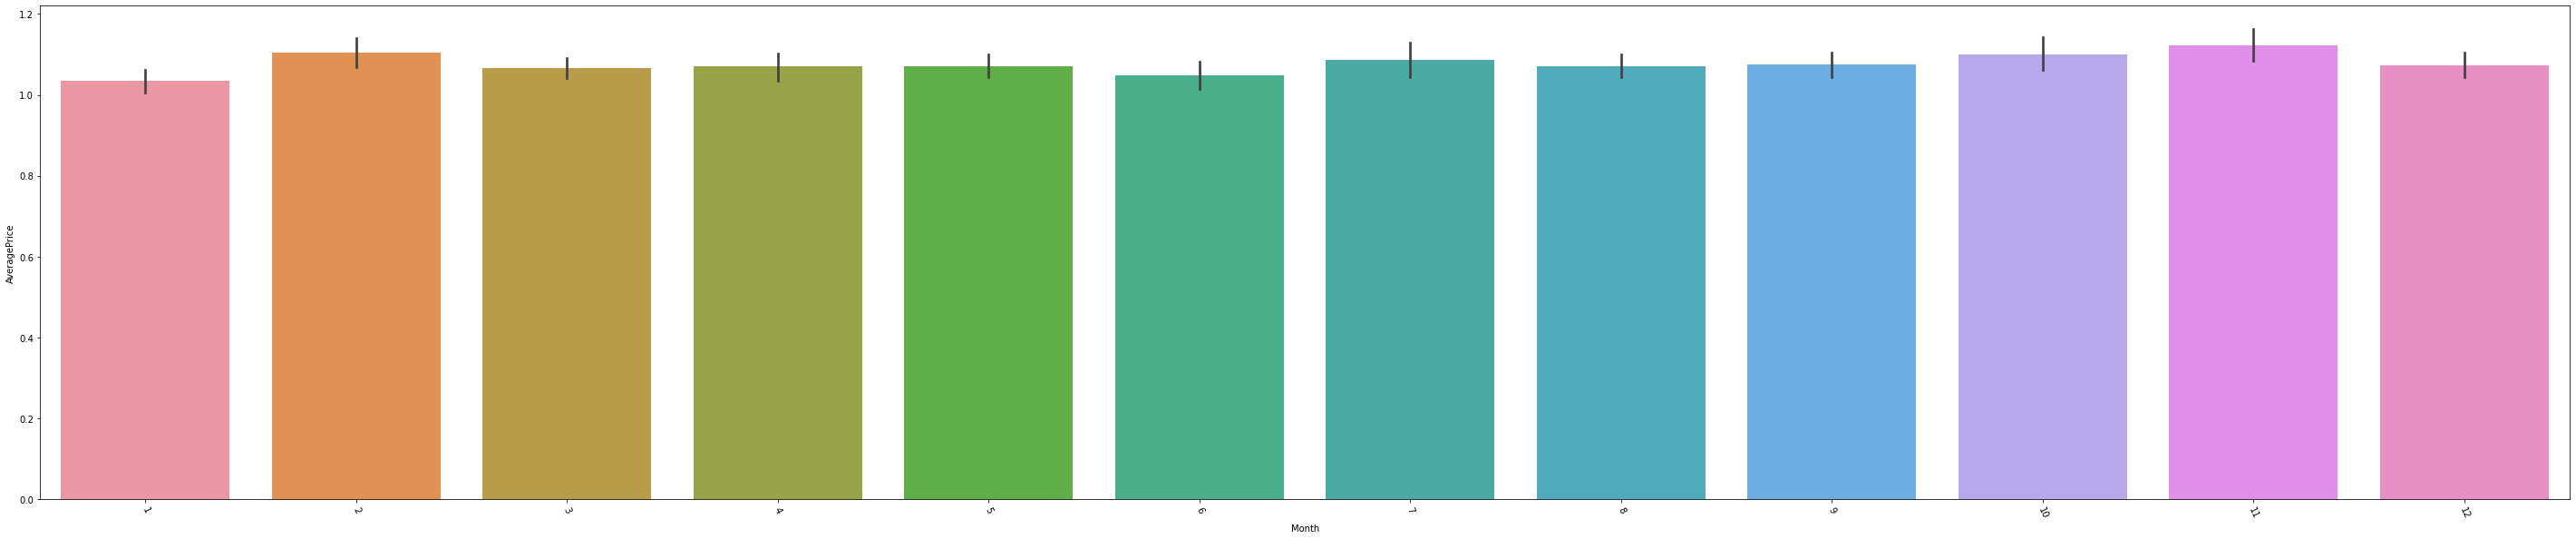

In [826]:
#To find the total volume of avocados sold per month.
plt.figure(figsize = (50,10))
sb.barplot(x = 'Month', y ='AveragePrice', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

The total volume of avocados sold based on months looks like steady ignoring the slight variations. 

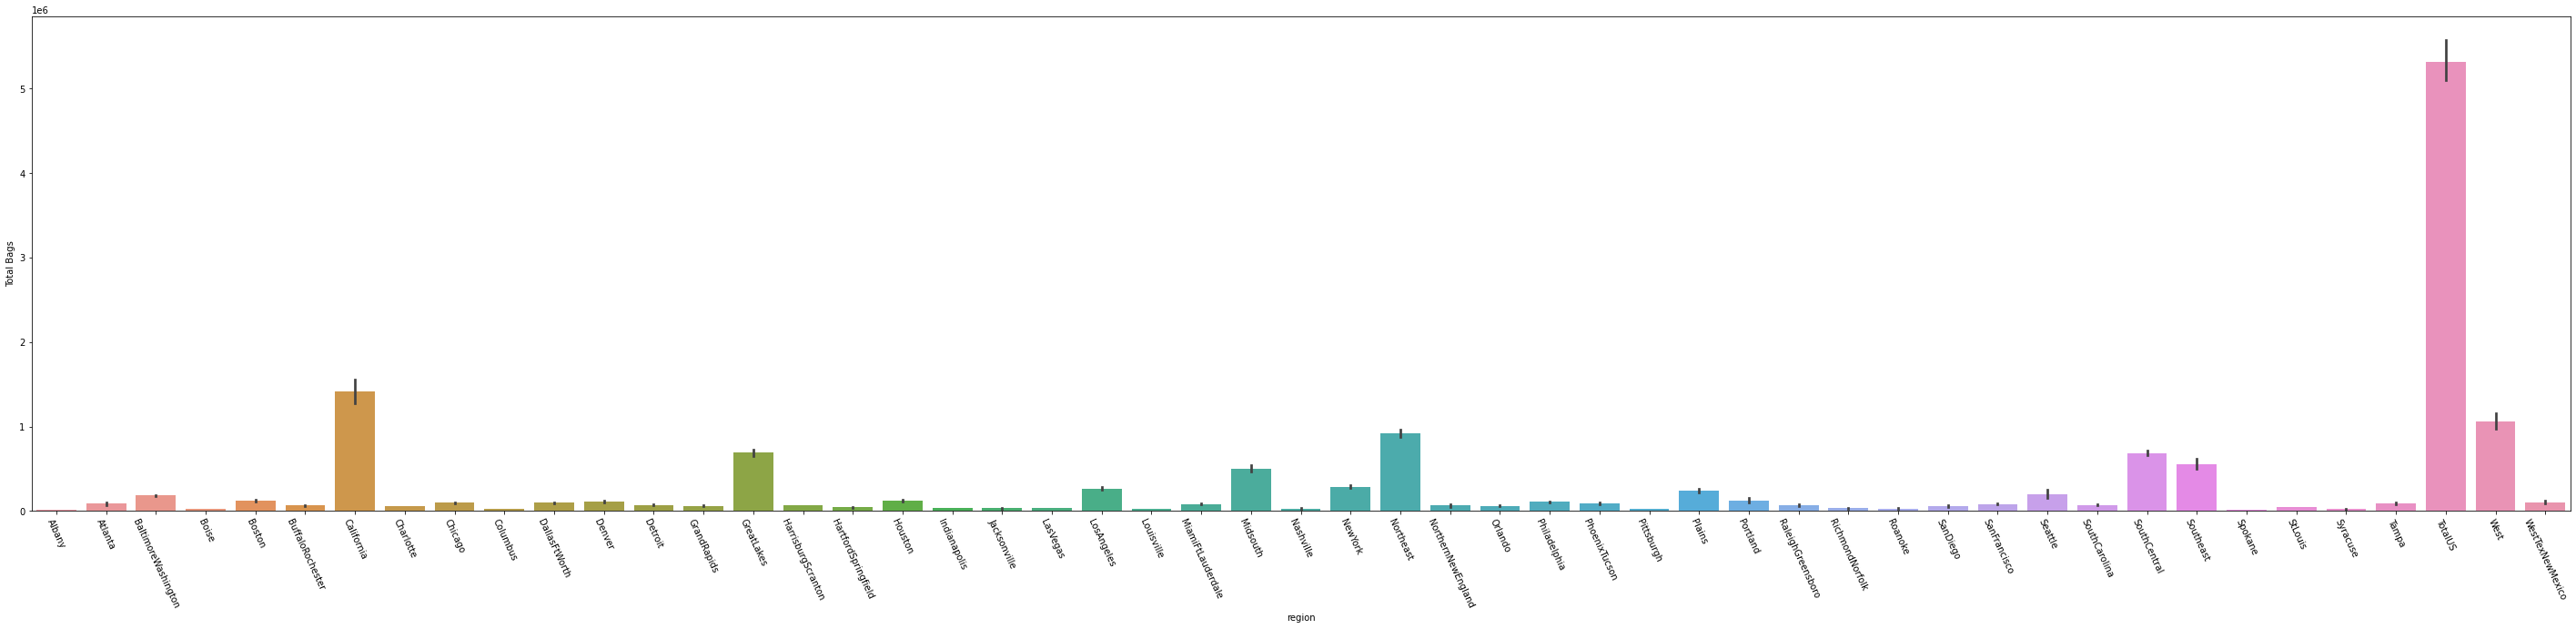

In [827]:
#To find the total count of bags used in different places. 
plt.figure(figsize = (50,10))
sb.barplot(x = 'region', y ='Total Bags', data = df)
plt.xticks(rotation = -65, fontsize = 10)
plt.show()

Total number of bags when sorted per city gives a different insight. 

    North East, Mid-South, Los Angeles, Great Lakes, and California has the highest number of total bags sold. 
    
    We can ignore the TotalUS count given in the graph. 

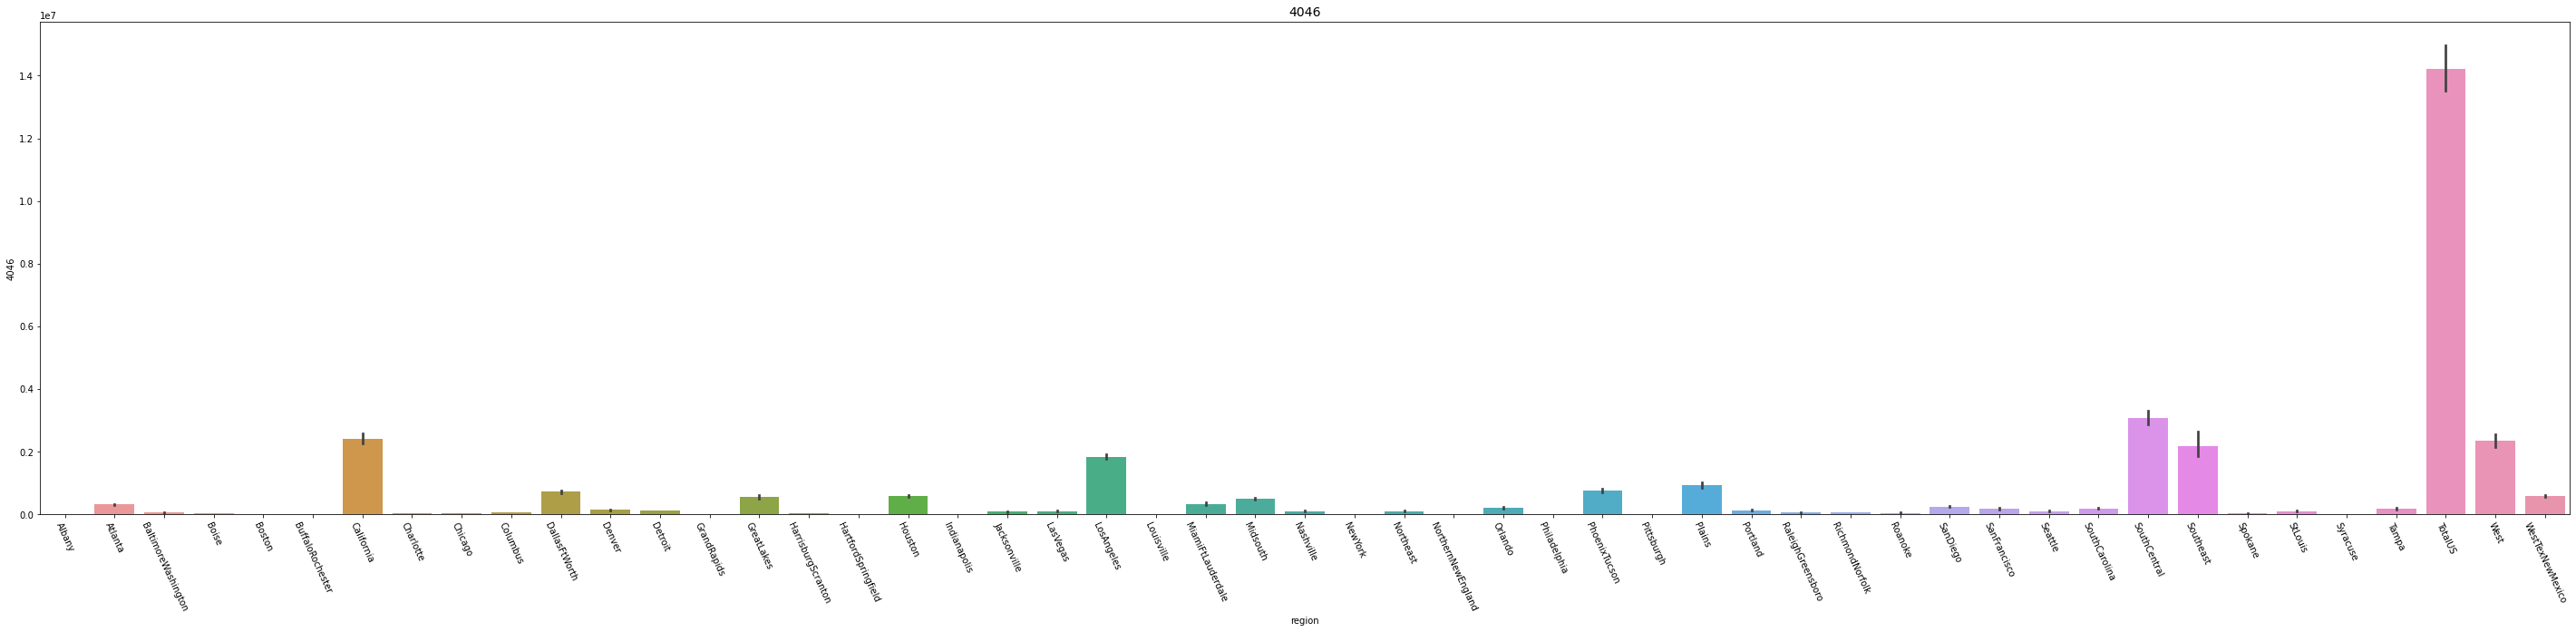

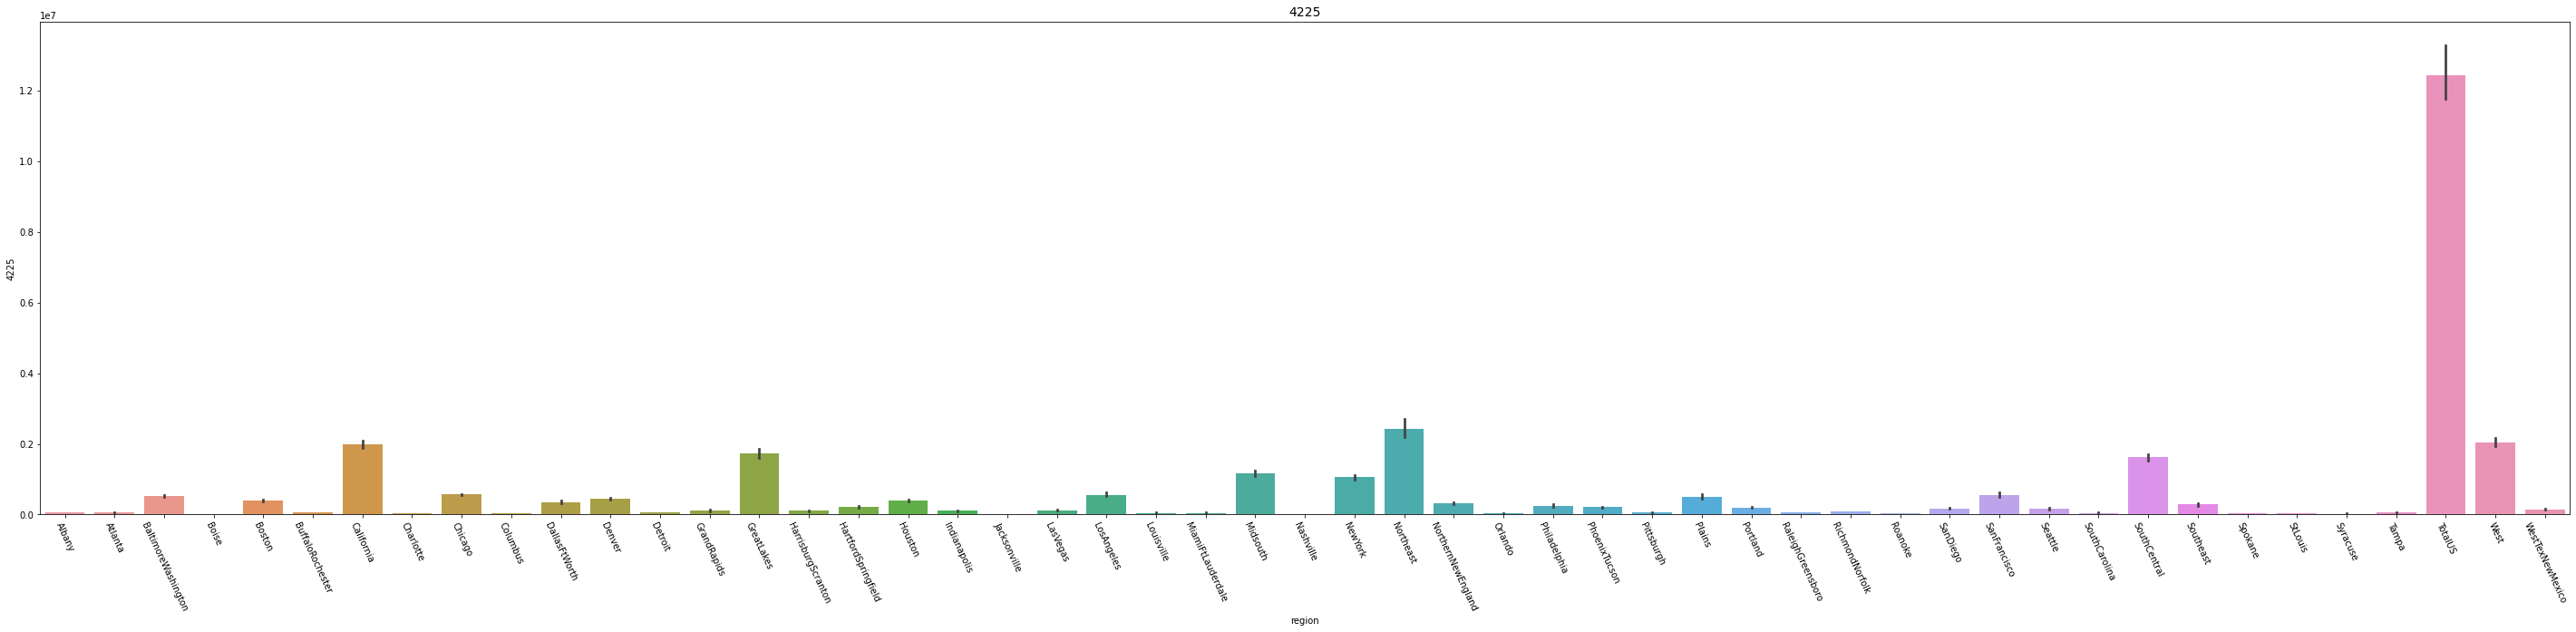

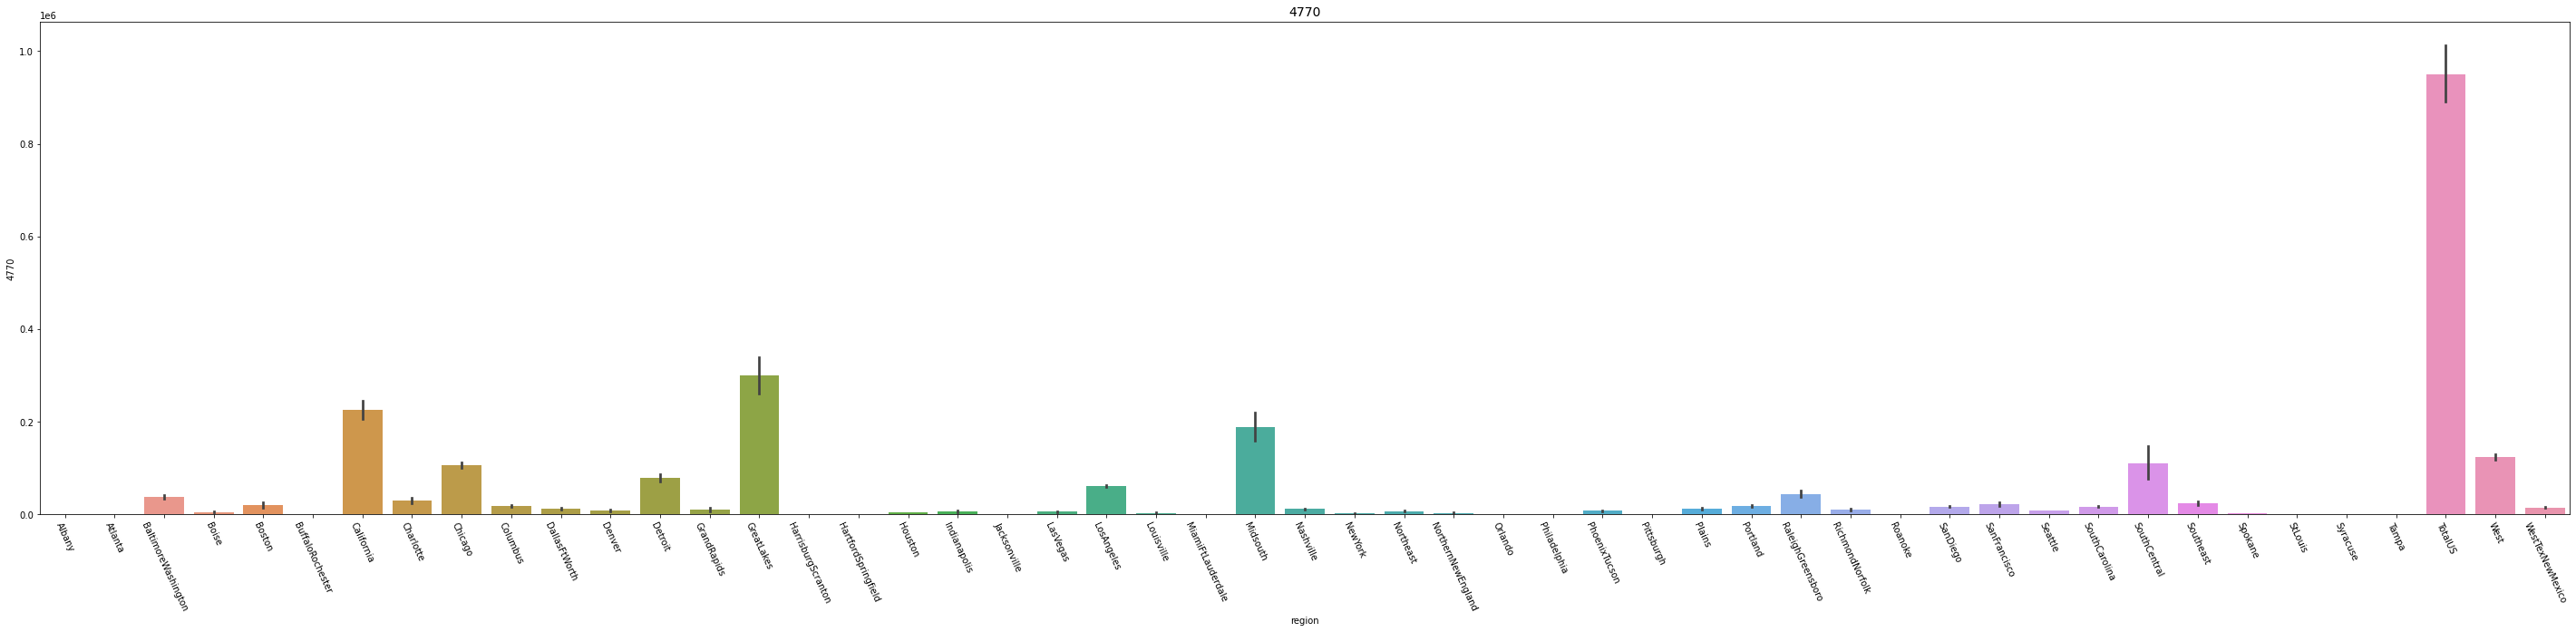

In [828]:
#Sales per city based on PLU
plu = ['4046', '4225', '4770']
for i in plu:
    plt.figure(figsize = (50,10))
    sb.barplot(x = 'region', y = i, data = df)
    plt.xticks(rotation = -65, fontsize = 10)
    plt.title(i, fontsize = 14)
    plt.show()

Observations: 
    
    PLU 4046: The highest numbers sold are in California, Los Angeles, South Central, South East, and West
    
    PLU 4225: The highest numbers sold are in California, Great Lakes, North East, and West 
    
    PLU 4770: The highest numbers sold are in California, Great Lakes, Mid South, South Central, and West.
    
From the above graphs we can conclude that the highest number of sales with respect to PLU are in California, Great Lakes, South Central, and West. 

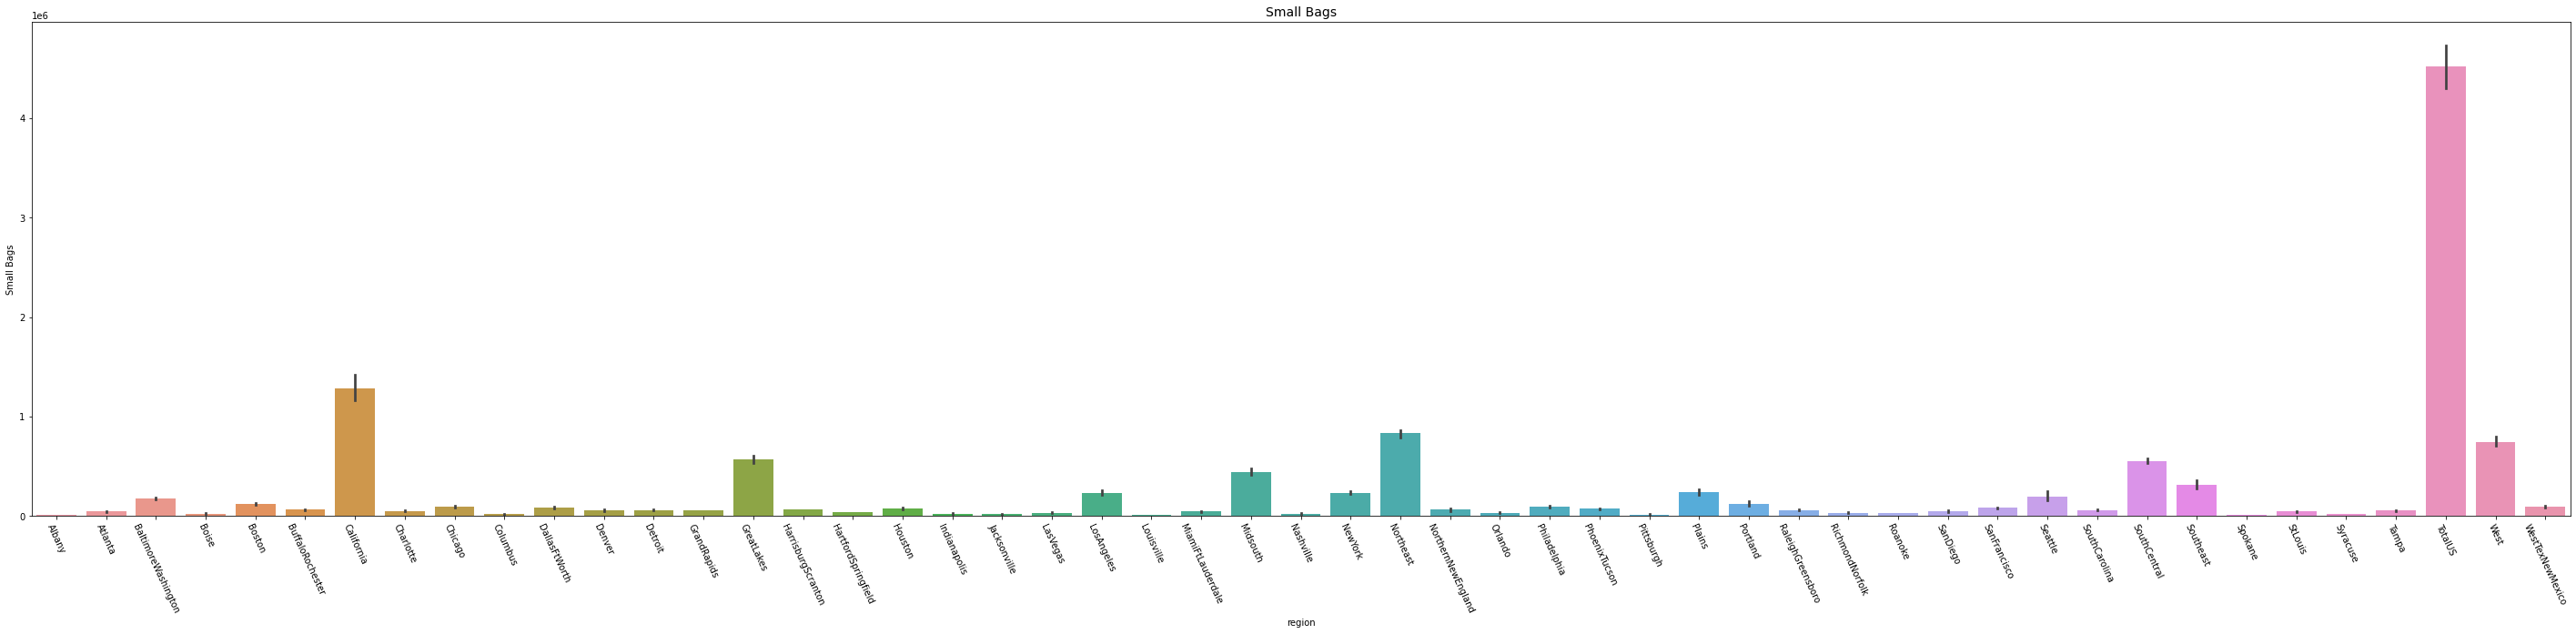

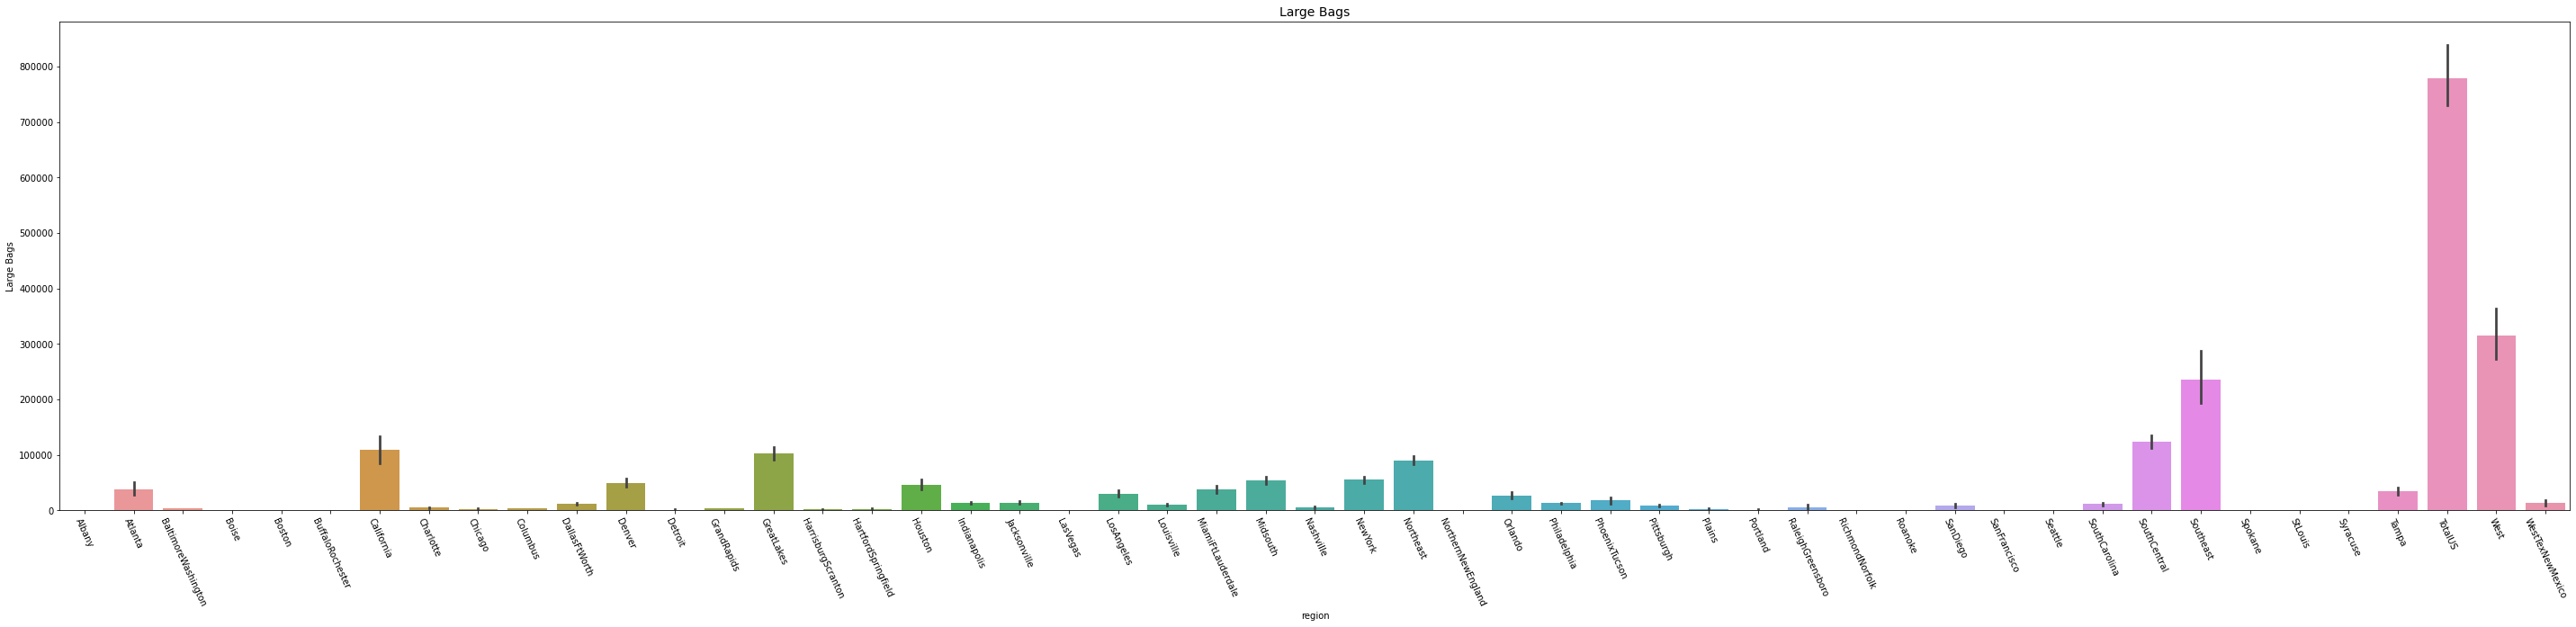

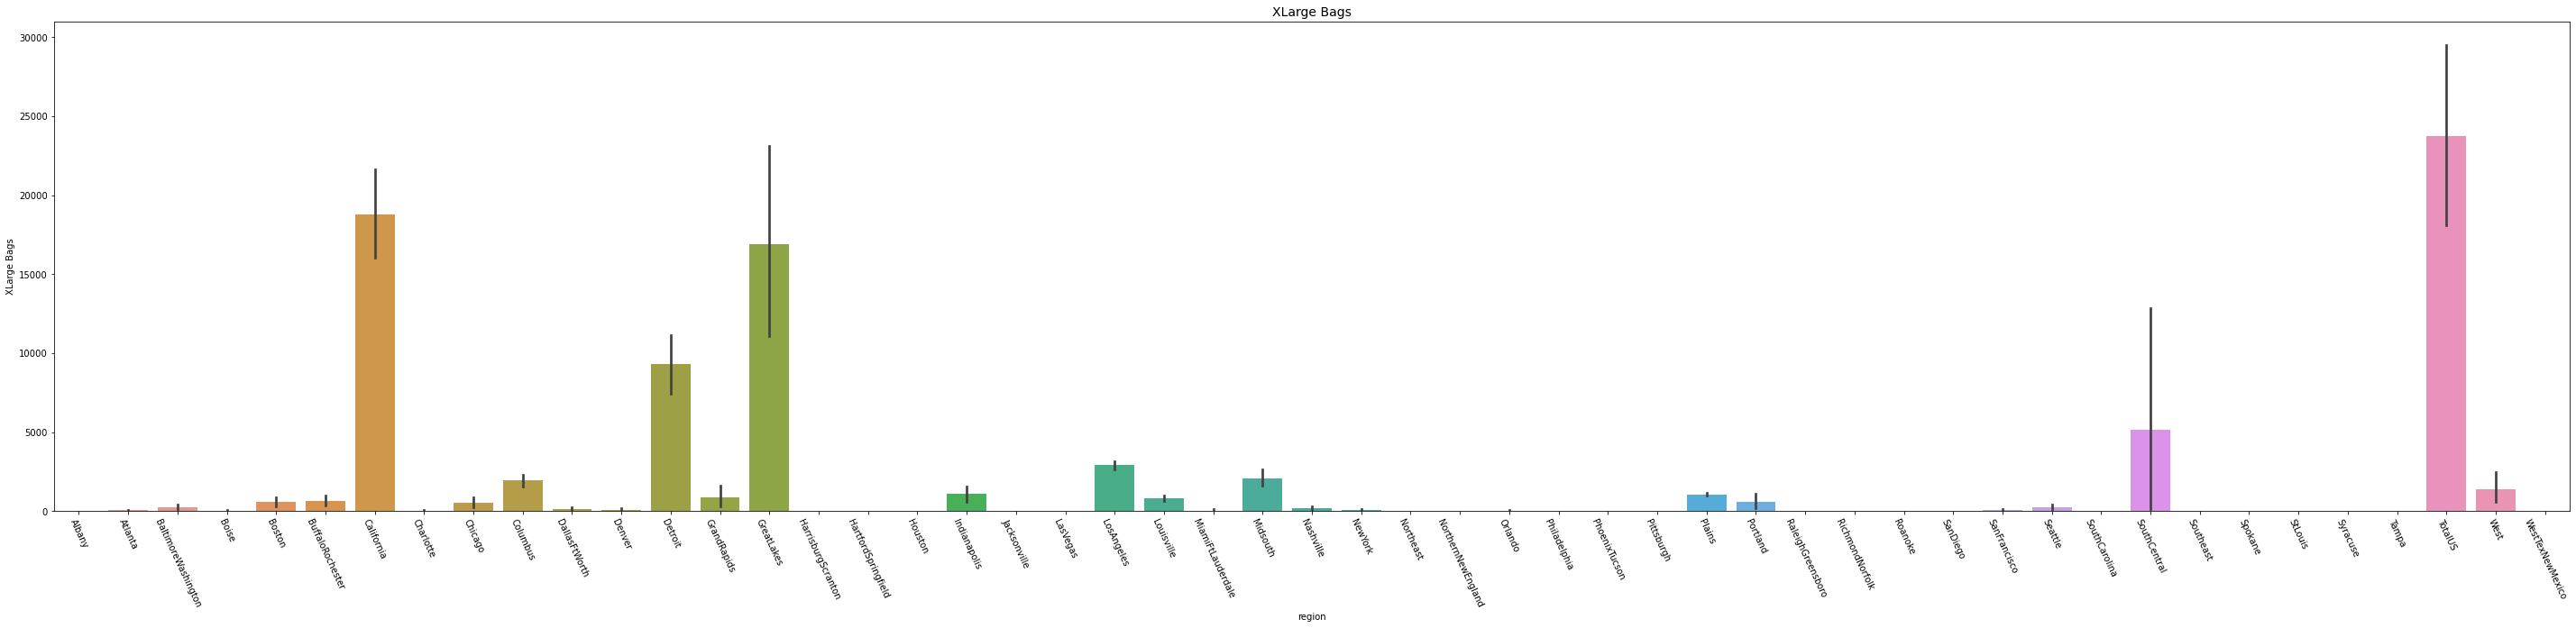

In [829]:
#Different sizes of bags used in different cities. 
bags = ['Small Bags', 'Large Bags', 'XLarge Bags']
for i in bags: 
    plt.figure(figsize = (50,10))
    sb.barplot(x = 'region', y = i, data = df)
    plt.xticks(rotation = -65, fontsize = 10)
    plt.title(i, fontsize = 14)
    plt.show()

Observations: 
    
    Small Bags: The total number of small bags used were in California, Great Lakes, North East, and West
    
    Large Bags: The total number of large bags used were in California, Great Lakes, North East, South Central, South East, and West
    
    XLarge Bags: The total number of extra large bags used were in California, Detroit, Great Lakes, and South Central

### Summary

In [830]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


Observations:
    
    There isn't much difference between mean and max values in the dataset except for XLarge Bags.
    
    The difference between 75th percentile and max values are only high for XLarge Bags.

### Encoding

In [831]:
from sklearn.preprocessing import LabelEncoder

In [832]:
le = LabelEncoder()

In [833]:
df['region'] = le.fit_transform(df['region'])

In [834]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29


In [835]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

### To find the correlation

In [836]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,-0.229408,0.178683,0.060642,0.092589
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,0.236579,-0.004189,-0.055212,-0.034857
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,0.269481,-0.040439,-0.053007,-0.031806
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,0.215733,-0.007254,-0.058429,-0.044008
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.138092,0.029222,-0.055079,-0.021318
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.190001,0.090108,-0.047747,-0.021137
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.168650,0.106382,-0.048978,-0.016462
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,0.297452,-0.018678,-0.039242,-0.046578
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,-0.046144,0.218342,0.021452,0.019315
region,-0.229408,0.236579,0.269481,0.215733,0.138092,0.190001,0.168650,0.297452,-0.046144,1.000000,-0.470472,0.000977,-0.028670


<AxesSubplot:>

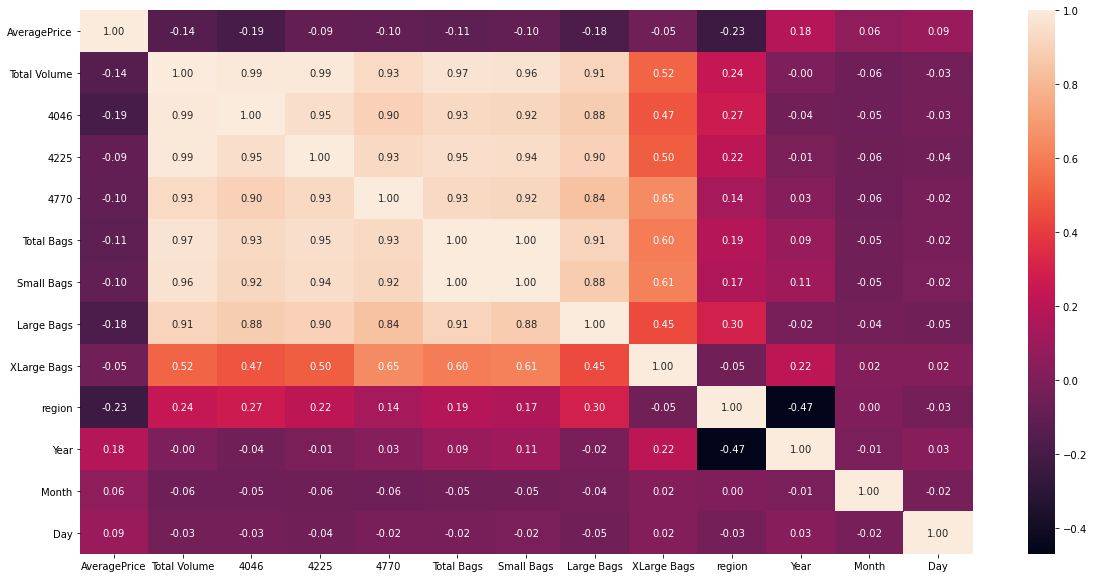

In [837]:
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f')

We can see a lot of values with high positive corelation. Plotting them separately to understand better. 

<AxesSubplot:>

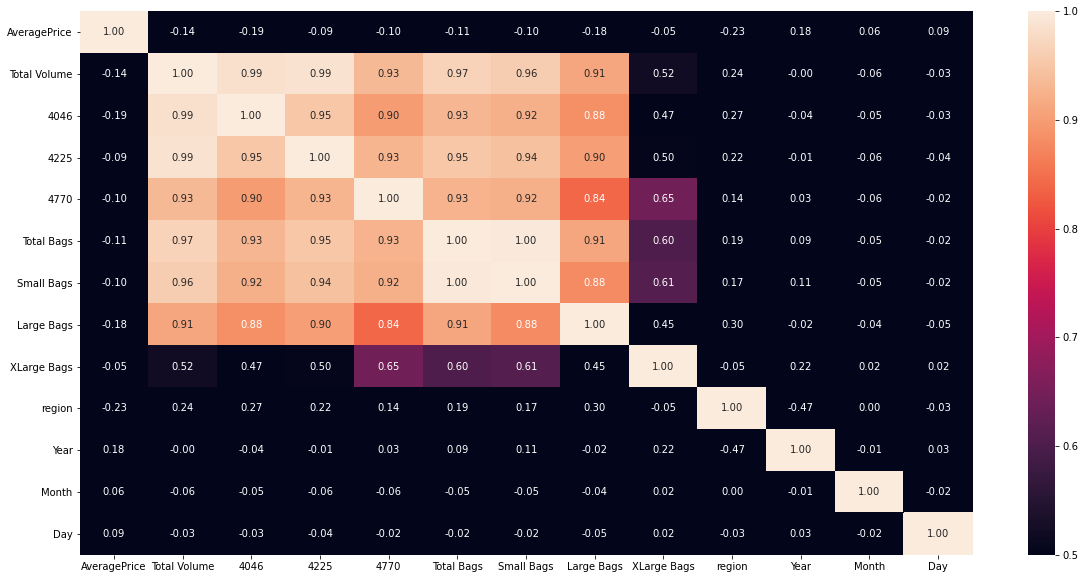

In [838]:
#Plotting heatmap for high positive correlation
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = 0.5, vmax = 1)

Observations: 
    
    High correlation present between Total Volume, 4046, 425, 4770, Total Bags, Small Bags & Large Bags with each other. 
    
    There is a specific relation for XLarge Bags with 4770, Total Bags, and Large Bags. 

<AxesSubplot:>

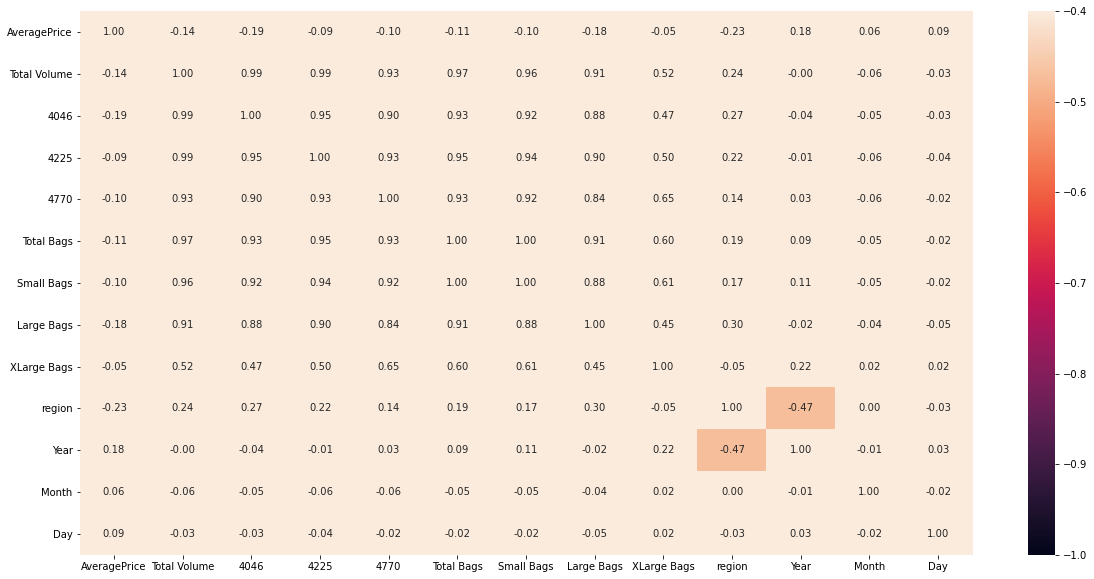

In [839]:
#Plotting heatmap for high negative correlation
plt.figure(figsize = (20,10))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = -1, vmax = -0.4)

Observations: 
    
    There is a slight negative correlation between Region and the year. 

### Checking for outliers in the data. 

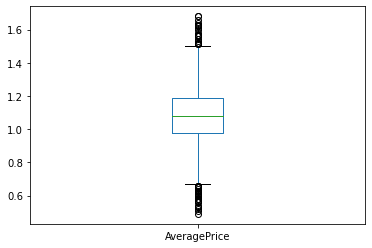

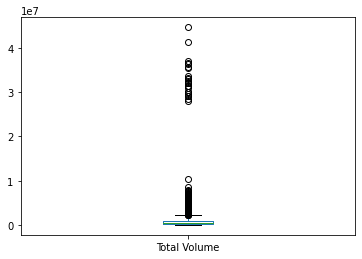

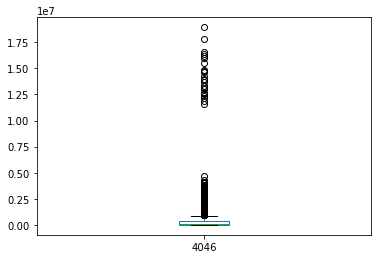

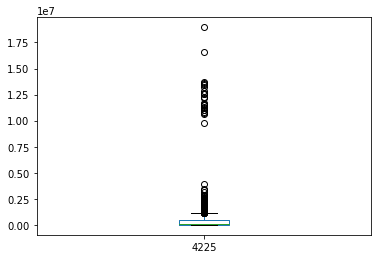

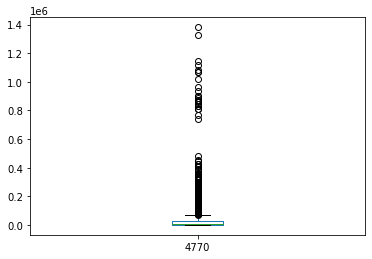

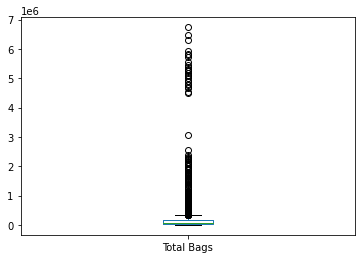

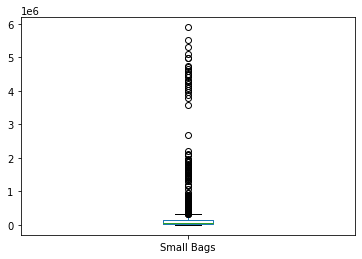

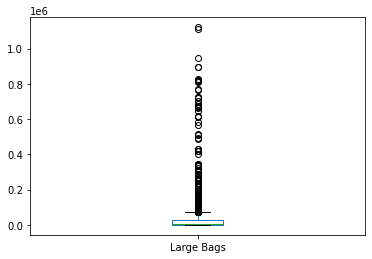

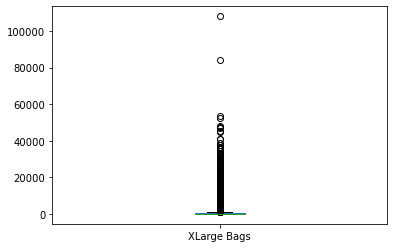

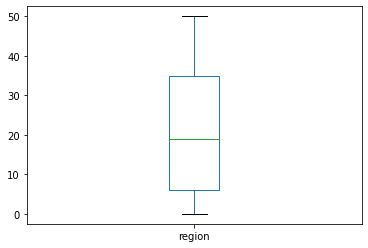

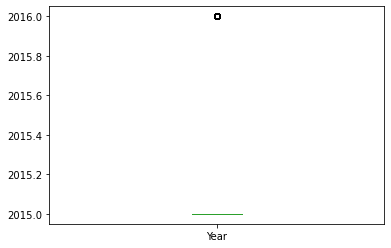

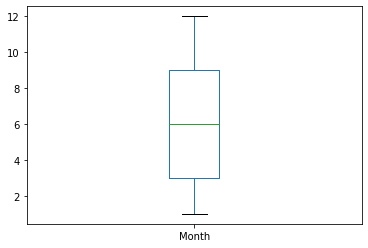

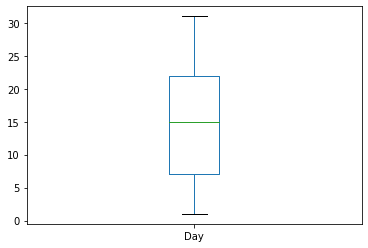

In [840]:
col = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'region', 'Year', 'Month',
       'Day']
for i in col: 
    df[i].plot.box()
    plt.show()

Observations: 
    
    We can ignore the year as it's a categorical variable. 
    
    There are high number of outliers in XLarge Bags, Large Bags, Small Bags, Total Bags, 4770, 4225, 4046, Total Volume, and Average Price. That's practically every other column except Region, Month, and Day.
    
    We will have to check the skewness of this dataset. 

### Dealing with the outliers. 

In [841]:
from scipy.stats import zscore

In [842]:
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
        1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
        1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
        1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
        1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
        1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
        1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
        1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
        1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
        1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
        1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
        1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
        1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
        1200, 1200, 1200, 1200, 1200, 

In [843]:
df_new = df[(z<3).all(axis = 1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7,2016,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7,2016,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7,2016,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7,2016,9,25


In [844]:
df_new.shape

(1436, 13)

In [845]:
#Finding the percentage of dataloss

loss = ((1517-1436)/1517)*100
loss

5.339485827290705

Here the dataloss is only 5.3%, which is minimal. So we can proceed with the outlier removed dataset. 

In [846]:
df = df_new

### Scaling

In [847]:
from sklearn.preprocessing import StandardScaler

In [848]:
ss = StandardScaler()

In [849]:
df = ss.fit_transform(df)

In [850]:
df = pd.DataFrame(df, columns = col)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
0,1.344989,-0.563692,-0.476055,-0.537420,-0.486320,-0.538421,-0.523070,-0.481439,-0.299919,-1.322817,-0.41387,1.637005,1.308085
1,1.451388,-0.569945,-0.476535,-0.554838,-0.486147,-0.535571,-0.519785,-0.481353,-0.299919,-1.322817,-0.41387,1.637005,0.528523
2,-0.782987,-0.527627,-0.476376,-0.440368,-0.484925,-0.540364,-0.525362,-0.481239,-0.299919,-1.322817,-0.41387,1.637005,-0.251039
3,0.015004,-0.553834,-0.475929,-0.506329,-0.485906,-0.548589,-0.535018,-0.480620,-0.299919,-1.322817,-0.41387,-0.096578,-0.362405
4,1.078992,-0.572509,-0.476181,-0.556258,-0.485852,-0.547275,-0.533757,-0.479328,-0.299919,-1.322817,-0.41387,1.348074,1.530817


### To plot the skewness

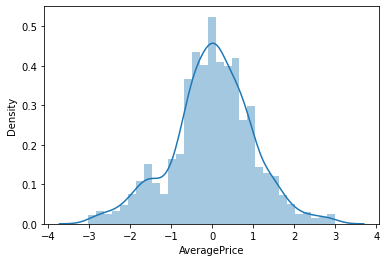

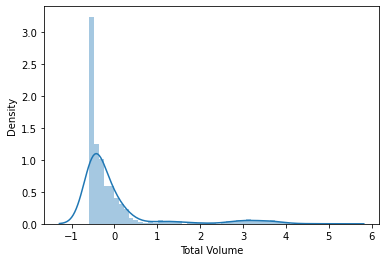

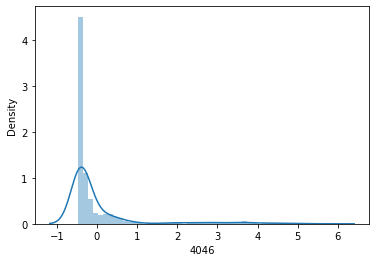

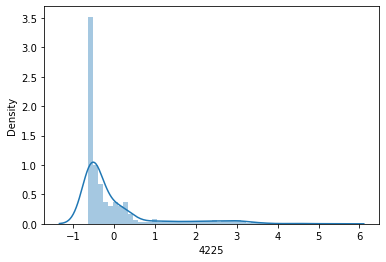

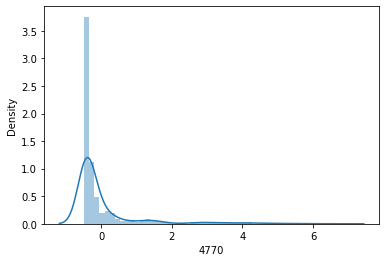

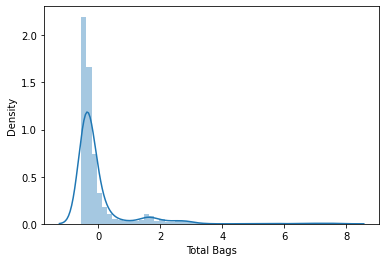

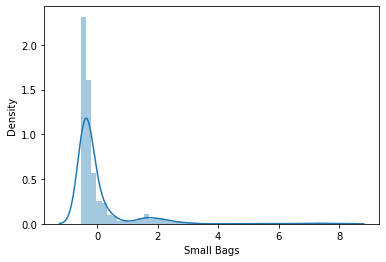

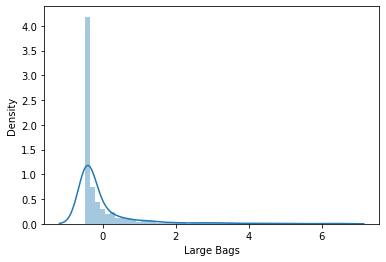

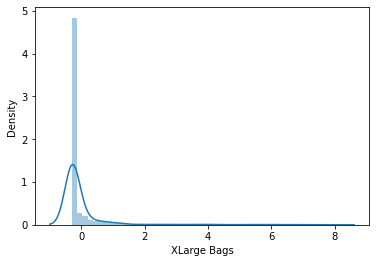

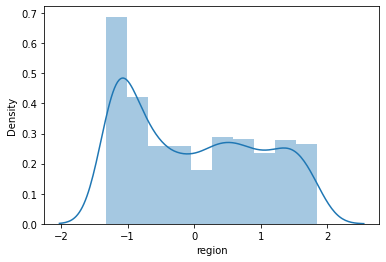

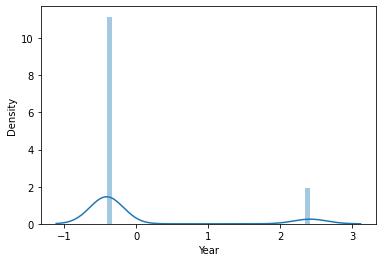

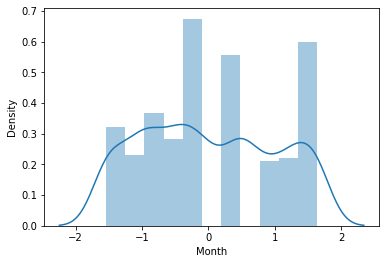

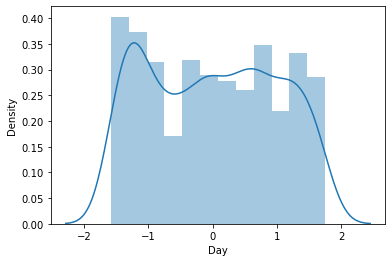

In [851]:
for i in col: 
    sb.distplot(df[i], kde = True)
    plt.show()

Observations: 

    We can see high skewness in XLarge Bags, Large Bags, Small Bags, Total Bags, 4770, 4225, 4046, and Total Volume.
    
    The skewness in Year can be ignored as it can be considered as categorical. 

### Dealing with the skewness

In [852]:
from sklearn.preprocessing import PowerTransformer

In [857]:
pt = PowerTransformer(method='yeo-johnson')

In [858]:
df = pt.fit_transform(df)

In [859]:
df = pd.DataFrame(df, columns = col)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
0,1.378128,-1.373676,-1.263964,-0.723788,-1.202777,-1.689389,-1.583980,-1.108223,-0.69649,-1.472059,-0.41387,1.568515,1.298246
1,1.493648,-1.432079,-1.271099,-0.846015,-1.200619,-1.658434,-1.548375,-1.107124,-0.69649,-1.472059,-0.41387,1.568515,0.538682
2,-0.794097,-1.058075,-1.268726,-0.158437,-1.185354,-1.710660,-1.609058,-1.105660,-0.69649,-1.472059,-0.41387,1.568515,-0.237322
3,-0.016573,-1.283858,-1.262092,-0.522166,-1.197598,-1.802135,-1.716797,-1.097741,-0.69649,-1.472059,-0.41387,-0.046631,-0.349920
4,1.091461,-1.456349,-1.265837,-0.856287,-1.196920,-1.787367,-1.702531,-1.081287,-0.69649,-1.472059,-0.41387,1.313329,1.513175


In [860]:
#Checking the skewness once again
df.skew()

AveragePrice    0.020131
Total Volume    0.141853
4046            0.242797
4225            0.213410
4770            0.228452
Total Bags      0.069326
Small Bags      0.082143
Large Bags      0.298041
XLarge Bags     0.953007
region          0.032209
Year            2.004439
Month          -0.003017
Day             0.010524
dtype: float64

We can see that the skewness has been removed. 

### Splitting X and Y

In [861]:
x = df.drop('AveragePrice', axis = 1)
y = df['AveragePrice']

In [862]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
0,-1.373676,-1.263964,-0.723788,-1.202777,-1.689389,-1.583980,-1.108223,-0.69649,-1.472059,-0.41387,1.568515,1.298246
1,-1.432079,-1.271099,-0.846015,-1.200619,-1.658434,-1.548375,-1.107124,-0.69649,-1.472059,-0.41387,1.568515,0.538682
2,-1.058075,-1.268726,-0.158437,-1.185354,-1.710660,-1.609058,-1.105660,-0.69649,-1.472059,-0.41387,1.568515,-0.237322
3,-1.283858,-1.262092,-0.522166,-1.197598,-1.802135,-1.716797,-1.097741,-0.69649,-1.472059,-0.41387,-0.046631,-0.349920
4,-1.456349,-1.265837,-0.856287,-1.196920,-1.787367,-1.702531,-1.081287,-0.69649,-1.472059,-0.41387,1.313329,1.513175


In [863]:
y.head()

0    1.378128
1    1.493648
2   -0.794097
3   -0.016573
4    1.091461
Name: AveragePrice, dtype: float64

### Running models

In [868]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [869]:
#Creating instances for each model
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [871]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

In [872]:
x_train.shape

(1005, 12)

In [873]:
x_test.shape

(431, 12)

In [874]:
y_train.shape

(1005,)

In [875]:
y_test.shape

(431,)

In [876]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred_test = m.predict(x_test)
    pred_train = m.predict(x_train)
    print('Score: ', a)
    print('Mean absolute error: ', mean_absolute_error(y_test,pred_test))
    print('Mean squared error: ', mean_squared_error(y_test,pred_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test)))
    print('R2 Score: ', r2_score(y_test,pred_test))
    print('\n\n')

LinearRegression()
Score:  0.3862228663231324
Mean absolute error:  0.6083536712898512
Mean squared error:  0.6056984995437097
Root mean squared error:  0.7782663422914482
R2 Score:  0.3920596879399356



KNeighborsRegressor()
Score:  0.7976801968446838
Mean absolute error:  0.43645602961866387
Mean squared error:  0.32843406650893514
Root mean squared error:  0.573091673738971
R2 Score:  0.6703503326572314



DecisionTreeRegressor()
Score:  1.0
Mean absolute error:  0.406892838358927
Mean squared error:  0.3753910551261764
Root mean squared error:  0.6126916476713032
R2 Score:  0.623219546738376



SVR()
Score:  0.7309245205766015
Mean absolute error:  0.40838341872281525
Mean squared error:  0.3061171247409707
Root mean squared error:  0.5532785236578144
R2 Score:  0.692749873935381



RandomForestRegressor()
Score:  0.9717785585154061
Mean absolute error:  0.3290423690631142
Mean squared error:  0.20737692536750235
Root mean squared error:  0.4553865669598768
R2 Score:  0.7918555307

### Cross Validation

In [877]:
from sklearn.model_selection import cross_val_score

In [879]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model: 
    print (m)
    i=[]
    for j in range (2,10):
        score = cross_val_score(m, x, y, cv = j)
        cv_mean = score.mean()
        i.append(cv_mean)
        a = i.index(max(i))+2
        b = max(i)
    print(f'At cross fold {a} the cv score is {b}')
    print('\n')

LinearRegression()
At cross fold 3 the cv score is 0.23351964158269178


KNeighborsRegressor()
At cross fold 3 the cv score is 0.13292638163399165


DecisionTreeRegressor()
At cross fold 8 the cv score is -0.20707102943956726


SVR()
At cross fold 3 the cv score is 0.4321350203545961


RandomForestRegressor()
At cross fold 5 the cv score is 0.13751831177083745


Lasso()
At cross fold 3 the cv score is -0.009480992219887074


Ridge()
At cross fold 3 the cv score is 0.23736831533164648


ElasticNet()
At cross fold 2 the cv score is 0.05869431241131523




Comparing the model's R2 Score with the CV Score, we can conclude that SVR is the best model for this dataset.

### Running the best model once again

In [880]:
svr.fit(x_train, y_train)
a = svr.score(x_train, y_train)
pred_test_svr = svr.predict(x_test)
pred_train_svr = svr.predict(x_train)
print('Score: ', a)
print('Mean absolute error: ', mean_absolute_error(y_test,pred_test_svr))
print('Mean squared error: ', mean_squared_error(y_test,pred_test_svr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test_svr)))
print('R2 Score: ', r2_score(y_test,pred_test_svr))

Score:  0.7309245205766015
Mean absolute error:  0.40838341872281525
Mean squared error:  0.3061171247409707
Root mean squared error:  0.5532785236578144
R2 Score:  0.692749873935381


### GridSearchCV

In [881]:
from sklearn.model_selection import GridSearchCV

In [885]:
parameters = {'kernel': ['rbf', 'poly', 'linear'], 'C': [0.1, 1], 'gamma': [1, 0.1], 'coef0' : [0.01,0.5]}
svr = SVR()
clf = GridSearchCV(svr, parameters, cv = 3, n_jobs = -1, verbose = 2)
clf.fit(x_train, y_train)

print(clf.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
{'C': 1, 'coef0': 0.5, 'gamma': 0.1, 'kernel': 'poly'}


In [888]:
svr = SVR(C = 1, coef0 = 0.5, gamma = 0.1, kernel = 'poly')
svr.fit(x_train, y_train)
svr.score(x_train, y_train)
pred_svr = svr.predict(x_test)

svrs = r2_score(y_test, pred_svr)
svrs

0.7442881421801066

We're getting a 74% accuracy for this model. 

### Plotting a graph to find the fitting

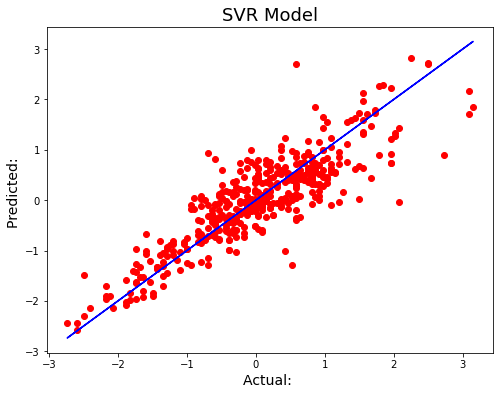

In [891]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_svr, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual: ', fontsize = 14)
plt.ylabel('Predicted: ', fontsize = 14)
plt.title('SVR Model', fontsize = 18)
plt.show()

### Saving the model

In [892]:
import joblib
joblib.dump(svr, 'Avocado.obj')

['Avocado.obj']

In [894]:
final = joblib.load('Avocado.obj')
final.predict(x_train)

array([-1.2050901 ,  0.71538108, -0.96983048, ...,  0.16912194,
       -0.73887812,  0.62194793])

### Conclusion

In [895]:
conclusion = pd.DataFrame([final.predict(x_test)[:], pred_svr[:]], index = ['Predicted', 'Original'])

In [896]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,421,422,423,424,425,426,427,428,429,430
Predicted,-0.619904,1.430428,0.158877,-1.915645,-0.211442,-0.831755,1.716943,-1.020321,0.049395,-1.229754,...,0.851173,-0.547672,1.072069,1.005113,0.323322,-1.579707,-0.054028,1.343362,-0.386539,-0.324186
Original,-0.619904,1.430428,0.158877,-1.915645,-0.211442,-0.831755,1.716943,-1.020321,0.049395,-1.229754,...,0.851173,-0.547672,1.072069,1.005113,0.323322,-1.579707,-0.054028,1.343362,-0.386539,-0.324186
